In [13]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet

--2022-05-24 15:12:33--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.216.42.57
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.216.42.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11886281 (11M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-01.parquet’

fhv_tripdata_2021-0 100%[===================>]  11.33M  --.-KB/s    in 0.1s    

2022-05-24 15:12:34 (114 MB/s) - ‘fhv_tripdata_2021-01.parquet’ saved [11886281/11886281]



In [12]:
!wget https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet

--2022-05-24 15:12:24--  https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet
Resolving nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)... 52.217.70.84
Connecting to nyc-tlc.s3.amazonaws.com (nyc-tlc.s3.amazonaws.com)|52.217.70.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10645466 (10M) [binary/octet-stream]
Saving to: ‘fhv_tripdata_2021-02.parquet’

fhv_tripdata_2021-0 100%[===================>]  10.15M  66.5MB/s    in 0.2s    

2022-05-24 15:12:25 (66.5 MB/s) - ‘fhv_tripdata_2021-02.parquet’ saved [10645466/10645466]



In [14]:
rm -rf ./data/

In [15]:
!mkdir ./data && mv ./fhv_* ./data/

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [5]:
df_january = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
df_january.shape

(1154112, 7)

In [6]:
df_january['duration'] = df_january.dropOff_datetime - df_january.pickup_datetime
df_january.duration = df_january.duration.apply(lambda td: td.total_seconds() / 60)

In [7]:
df_january.duration.mean()

19.167224093791006

<AxesSubplot:xlabel='duration', ylabel='Count'>

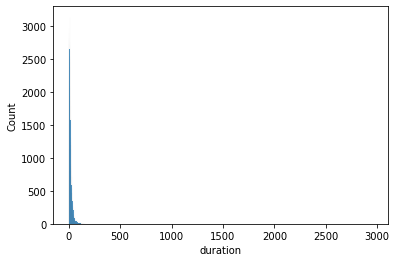

In [8]:
sns.histplot(df_january.duration.sample(100000))

In [9]:
df_january = df_january[(df_january.duration >= 1) & (df_january.duration <= 60)]

<AxesSubplot:xlabel='duration', ylabel='Count'>

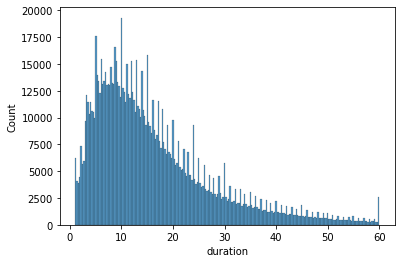

In [10]:
sns.histplot(df_january.duration)

In [11]:
categorical = ['PUlocationID', 'DOlocationID']
df_january[categorical] = df_january[categorical].fillna(-1).astype(str)

In [12]:
df_january.shape

(1109826, 8)

In [13]:
df_january.PUlocationID.value_counts(normalize=True)

-1.0     8.352733e-01
221.0    7.505681e-03
206.0    6.124383e-03
129.0    4.846706e-03
115.0    3.678054e-03
             ...     
111.0    4.505211e-06
27.0     3.604169e-06
34.0     2.703126e-06
2.0      1.802084e-06
110.0    9.010421e-07
Name: PUlocationID, Length: 262, dtype: float64

In [14]:
dv = DictVectorizer()

In [15]:
train_features_dicts = df_january[categorical].to_dict('records')

In [16]:
X_train = dv.fit_transform(train_features_dicts)

In [17]:
len(dv.feature_names_)

525

In [18]:
target = 'duration'
y_train = df_january[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

10.528519395373376

In [23]:
# valid
df_feb = pd.read_parquet('./data/fhv_tripdata_2021-02.parquet')
df_feb['duration'] = df_feb.dropOff_datetime - df_feb.pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]
df_feb[categorical] = df_feb[categorical].fillna(-1).astype(str)
valid_features_dicts = df_feb[categorical].to_dict('records')
X_valid = dv.transform(valid_features_dicts)
y_valid = df_feb[target].values
y_pred = lr.predict(X_valid)

mean_squared_error(y_valid, y_pred, squared=False)

11.014287129772693